# datafun-06-eda brooke richards 6/7/24
```
The purpose of this project is to perform your own unique exploratory data analysis project and present data stories by narrating your process and sharing the insights gained from the data.
```



   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.4

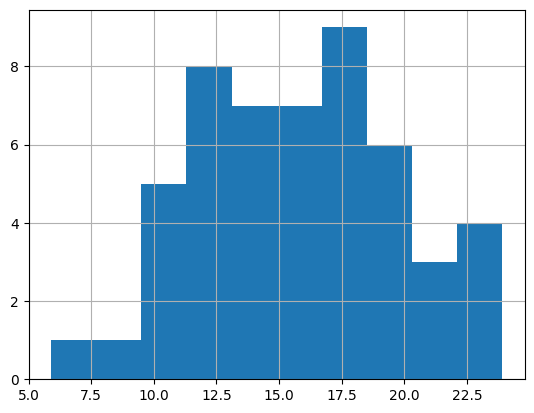

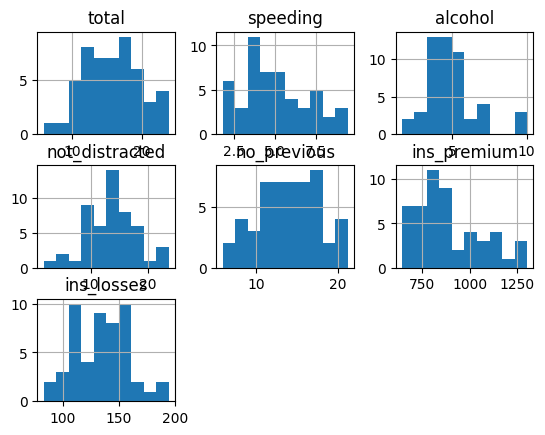

In [2]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data acquisition
df = sns.load_dataset('car_crashes')

# initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

# initial descriptive statistics
print(df.describe())

# initial data distribution for numerical columns
# inspect histogram by numerical column
df['total'].hist()

# inspect histograms for all numerical columns
df.hist()

# show all plots
plt.show()

document observations

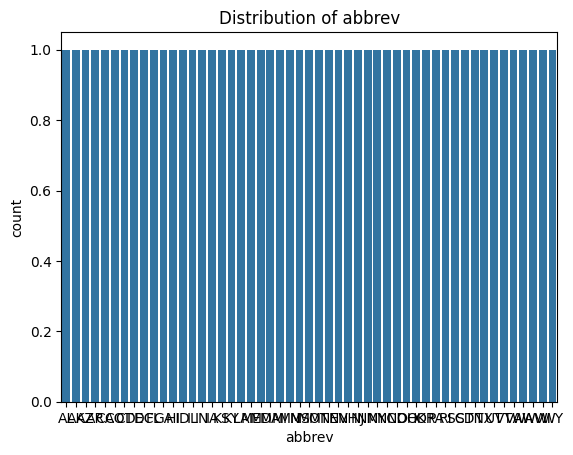

In [3]:
# initial data distribution for categorical columns
# inspect value counts by categorical column
df['abbrev'].value_counts()

# inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# show all plots
plt.show()

document observations

In [ ]:
# initial data transformation and feature engineering
